# Préparation de l'espace de travail

## Importations

In [1]:
!pip install openpyxl cartiflette mapclassify

import openpyxl 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from cartiflette import carti_download
import mapclassify
import plotly.express as px

## Lecture des bases de données

### Base de la démographie des médecins : medecin

In [2]:
# Lecture du Excel medecins 
df_medecins_effectif_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=1)
df_medecins_age_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=2)
df_medecins_densite_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=3)

In [3]:
# Traitement de la feuille des effectifs : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_effectif = df_medecins_effectif_complet[(df_medecins_effectif_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_effectif_complet['sexe'] == '0-Ensemble')
    & (df_medecins_effectif_complet['specialites'] == '00-Ensemble')
    ]

df_medecins_effectif.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)
df_medecins_effectif.reset_index(drop = True, inplace = True)

df_medecins_effectif

/tmp/ipykernel_124210/4005277689.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_effectif.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)


,territoire,region,departement,exercice,tranche_age,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,00-Ensemble,101435,101385,101904,101935,101799,101755,101939,101381,101355,100621,99941,99457,99009,100019
1,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,01-moins de 30 ans,1175,1427,1704,2039,2133,2249,2454,2422,2442,2210,2056,1992,2024,2167
2,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,02-entre 30 et 34 ans,6392,6391,6871,7883,8983,10102,11294,12138,12993,13240,13536,13434,12878,12671
3,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,03-entre 35 et 39 ans,8362,8277,8223,8110,8020,8019,8299,8878,9785,10960,12223,13280,14368,15490
4,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,04-entre 40 et 44 ans,9946,9701,9480,9184,8911,8548,8547,8475,8284,8175,8225,8444,8947,10062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,02-entre 30 et 34 ans,0,0,0,0,0,0,0,0,0,0,0,1,2,2
7316,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,03-entre 35 et 39 ans,0,0,1,0,0,0,0,0,0,0,1,1,1,0
7317,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,04-entre 40 et 44 ans,0,0,0,1,1,1,1,0,0,0,0,0,0,0
7318,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,4-Autre Salarié,00-Ensemble,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
# Traitement de la feuille des âges moyens : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_age = df_medecins_age_complet[(df_medecins_age_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_age_complet['sexe'] == '0-Ensemble')
    & (df_medecins_age_complet['specialites'] == '00-Ensemble')]

df_medecins_age.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)
df_medecins_age.reset_index(drop = True, inplace = True)

df_medecins_age

/tmp/ipykernel_124210/650117258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_age.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)


,territoire,region,departement,exercice,am_2012,am_2013,am_2014,am_2015,am_2016,am_2017,am_2018,am_2019,am_2020,am_2021,am_2022,am_2023,am_2024,am_2025
0,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,51.1,51.4,51.6,51.7,51.7,51.7,51.4,51.3,51.1,51.1,50.8,50.7,50.6,50.4
1,0-France entière,00-Ensemble,000-Ensemble,1-Libéral,51.9,52.2,52.4,52.4,52.4,52.3,52.1,51.8,51.5,51.3,50.9,50.5,50.4,50.1
2,0-France entière,00-Ensemble,000-Ensemble,2-Mixte,52,51.9,51.8,51.3,50.9,50.7,50.4,49.8,49.5,49,48.5,48,47.5,46.9
3,0-France entière,00-Ensemble,000-Ensemble,3-Salarié hospitalier,46.2,46.4,46.6,46.8,46.8,46.8,46.7,46.8,46.8,47.1,47.5,48,48.4,48.5
4,0-France entière,00-Ensemble,000-Ensemble,4-Autre Salarié,52.4,53.1,53.7,54.1,54.4,54.7,54.8,55,55.1,55.2,55.3,55.3,55.3,55.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,3-COM ou Etranger,99-COM ou etranger,000-Ensemble,4-Autre Salarié,.,.,.,.,.,.,.,.,.,.,.,.,ND,.
618,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,0-Ensemble,.,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
619,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,1-Libéral,.,.,.,ND,.,.,.,ND,ND,ND,.,.,ND,ND
620,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,.,ND,ND,ND,ND,ND,ND,.,.,ND,ND,ND,ND,ND


In [5]:
# Traitement de la feuille des densités : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_densite = df_medecins_densite_complet[(df_medecins_densite_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_densite_complet['sexe'] == '0-Ensemble')
    & (df_medecins_densite_complet['specialites'] == '00-Ensemble')]

df_medecins_densite.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)
df_medecins_densite.reset_index(drop = True, inplace = True)

df_medecins_densite

/tmp/ipykernel_124210/501445641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_densite.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)


,territoire,region,departement,exercice,tranche_age,densite_2012,densite_2013,densite_2014,densite_2015,densite_2016,densite_2017,densite_2018,densite_2019,densite_2020,densite_2021,densite_2022,densite_2023,densite_2024,densite_2025
0,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,00-Ensemble,155.48,154.63,154.09,153.46,152.85,152.39,152.17,150.73,150.29,148.63,146.84,145.73,144.67,145.79
1,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,01-moins de 30 ans,1.80,2.18,2.58,3.07,3.20,3.37,3.66,3.60,3.62,3.26,3.02,2.92,2.96,3.16
2,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,02-entre 30 et 34 ans,9.80,9.75,10.39,11.87,13.49,15.13,16.86,18.05,19.27,19.56,19.89,19.68,18.82,18.47
3,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,03-entre 35 et 39 ans,12.82,12.62,12.43,12.21,12.04,12.01,12.39,13.20,14.51,16.19,17.96,19.46,20.99,22.58
4,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,04-entre 40 et 44 ans,15.24,14.80,14.34,13.83,13.38,12.80,12.76,12.60,12.28,12.08,12.08,12.37,13.07,14.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,02-entre 30 et 34 ans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7316,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,03-entre 35 et 39 ans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7317,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,2-Mixte,04-entre 40 et 44 ans,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7318,3-COM ou Etranger,99-COM ou etranger,999- COM ou Etranger,4-Autre Salarié,00-Ensemble,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Base de l'indicateur APL (Accessibilité Potentielle Localisée) pour les médecins généralistes 

Cet indicateur est une mesure de l'accessibilité aux médecins libéraux, qui tient compte du niveau d'activité des médecins (offre) et du niveau de recours de la population (demande). Cet indicateur est construit au niveau communal mais prend en compte l'offre et la demande des communes voisines, dans un certain périmètre.
Pour son calcul, on définit une zone de recours et une zone de patientèle. Les médecins sont comptés en ETP (équivalent temps plein), afin de prendre en compte leur activité annuelle.
L'APL nous donne finalement le nombre d'ETP des médecins généralistes libéraux pour 100 000 habitants.
Les données de 2015 à 2021 n'utilisent pas exactement la même méthode que de 2022 à 2023, donc ces données ne sont pas parfaitement comparables.

In [6]:
# Lecture du Excel APL_2022_2023 : tableau de la pondération de la population
# (consommation moyenne en soins de la tranche d'âge rapportée à la consommation moyenne de la population)
df_pond_population_2022_2023 = pd.read_excel("Bases de données/APL_2022_2023.xlsx", sheet_name=0)[21:40]
df_pond_population_2022_2023.reset_index(drop=True, inplace=True)

# Renommage des colonnes
df_pond_population_2022_2023.columns = ["Tranche d'âge", "Poids de la tranche d'âge en 2022", "Poids de la tranche d'âge en 2023"]

# Lecture du Excel APL_2015_2022 : tableau de pondération de la population (on exclut l'année 2022 en supposant que les données de APL_2022_2023 sont plus pertinentes)
df_pond_population_2015_2021 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=0)[21:40]
df_pond_population_2015_2021.reset_index(drop=True, inplace=True)

# Renommage des colonnes
df_pond_population_2015_2021.columns = ["Tranche d'âge", "Poids de la tranche d'âge en 2015", "Poids de la tranche d'âge en 2016", "Poids de la tranche d'âge en 2017", 
    "Poids de la tranche d'âge en 2018", "Poids de la tranche d'âge en 2019", "Poids de la tranche d'âge en 2021", "Poids de la tranche d'âge en 2022 bis"]
df_pond_population_2015_2021.drop("Poids de la tranche d'âge en 2022 bis", axis=1, inplace=True)

# Merging des deux tables sur la clé de la tranche d'âge
df_pond_population = df_pond_population_2015_2021.merge(right=df_pond_population_2022_2023, how="left", on=["Tranche d'âge"])

df_pond_population

,Tranche d'âge,Poids de la tranche d'âge en 2015,Poids de la tranche d'âge en 2016,Poids de la tranche d'âge en 2017,Poids de la tranche d'âge en 2018,Poids de la tranche d'âge en 2019,Poids de la tranche d'âge en 2021,Poids de la tranche d'âge en 2022,Poids de la tranche d'âge en 2023
0,Moins de 5 ans,1.25,1.25,1.26,1.25,1.24,1.24,0.93,1.12
1,de 5 à 9 ans,0.75,0.8,0.74,0.74,0.74,0.74,0.59,0.58
2,de 10 à 14 ans,0.65,0.65,0.63,0.62,0.62,0.62,0.55,0.51
3,de 15 à 19 ans,0.67,0.65,0.64,0.65,0.65,0.65,0.59,0.6
4,de 20 à 24 ans,0.67,0.66,0.67,0.68,0.68,0.68,0.73,0.75
5,de 25 à 29 ans,0.72,0.72,0.71,0.72,0.71,0.71,0.78,0.79
6,de 30 à 34 ans,0.77,0.79,0.78,0.77,0.77,0.77,0.84,0.82
7,de 35 à 39 ans,0.81,0.82,0.82,0.82,0.81,0.81,0.88,0.85
8,de 40 à 44 ans,0.87,0.87,0.86,0.87,0.87,0.86,0.9,0.89
9,de 45 à 49 ans,0.94,0.93,0.94,0.93,0.93,0.93,0.97,0.93


In [7]:
# Lecture des deux feuilles de la table APL_2022_2023
df_APL_2022 = pd.read_excel("Bases de données/APL_2022_2023.xlsx", sheet_name=1)[8:]
df_APL_2023 = pd.read_excel("Bases de données/APL_2022_2023.xlsx", sheet_name=2)[8:]

# Nettoyage et renommage des colonnes
bases = [df_APL_2022, df_APL_2023]
annee = 2022

for base in bases : 
    base.drop(8,inplace=True)
    base.reset_index(drop=True, inplace=True)
    base.columns = ["Code commune INSEE", "Commune", f"APL_{annee}", f"APL_{annee}_moins_65", f"APL_{annee}_moins_62", f"APL_{annee}_moins_60", f"population_standard_{annee-2}", f"population_totale_{annee-2}"]
    annee += 1

# Lecture des feuilles de la table APL_2015_2022 (on exclut l'année 2022 en supposant que les données de APL_2022_2023 sont plus pertinentes)
df_APL_2015 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=1)[8:]
df_APL_2016 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=2)[8:]
df_APL_2017 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=3)[8:]
df_APL_2018 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=4)[8:]
df_APL_2019 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=5)[8:]
df_APL_2021 = pd.read_excel("Bases de données/APL_2015_2022.xlsx", sheet_name=6)[8:]

# Nettoyage et renommage des colonnes
bases = [df_APL_2015,df_APL_2016,df_APL_2017,df_APL_2018,df_APL_2019,df_APL_2021]
annee = 2015

for base in bases : 
    base.drop(8,inplace=True)
    base.reset_index(drop=True, inplace=True)
    base.columns = ["Code commune INSEE", "Commune", f"APL_{annee}", f"APL_{annee}_moins_65", f"population_standard_{annee-2}", f"population_totale_{annee-2}"]
    annee += 1
    if annee == 2020 : 
        annee += 1

bases.append(df_APL_2022)
df_APL = df_APL_2023
for base in bases : 
    df_APL = df_APL.merge(base, how='left', on=["Code commune INSEE", "Commune"])

df_APL['departement'] = df_APL['Code commune INSEE'].astype(str).str[:2]

In [8]:
# On crée l'indicateur  APL par département pour l'année 2023
df_APL["APL_2023"] = pd.to_numeric(df_APL["APL_2023"], errors="coerce")

df_APL['APL_2023_pond'] = df_APL['APL_2023'] * df_APL['population_standard_2021']
df_APL["APL_dep_2023"] = df_APL.groupby("departement")['APL_2023_pond'].transform("mean")

df_APL["APL_dep_2023"] = pd.to_numeric(df_APL["APL_dep_2023"], errors="coerce")

# On crée l'indicateur  APL par département pour les années 2015 à 2022, 2020 exclu
annees = [2015, 2016, 2017, 2018, 2019, 2021, 2022]

for annee in annees : 
    df_APL[f"APL_{annee}"] = pd.to_numeric(df_APL[f"APL_{annee}"], errors="coerce")
    df_APL[f'APL_{annee}_pond'] = df_APL[f'APL_{annee}'] * df_APL[f'population_standard_{annee - 2}']

    df_APL[f"APL_dep_{annee}"] = df_APL.groupby("departement")[f'APL_{annee}_pond'].transform("mean")
    df_APL[f"APL_dep_{annee}"] = pd.to_numeric(df_APL[f"APL_dep_{annee}"], errors="coerce")

### Base de la patientèle des médecins 

In [9]:
df_patientele = pd.read_csv("Bases de données/Données_Patientele_Departementale.csv", sep=";")

# Enlever les caractères cachés dans le nom des colonnes (provoquaient des bugs dans la suite du code)
df_patientele.columns = df_patientele.columns.str.replace('\ufeff', '').str.strip()

df_patientele["nombre_patients_uniques"] = pd.to_numeric(df_patientele["nombre_patients_uniques"], errors="coerce")
df_patientele['profession_sante'].unique()

array(['Anesthésistes-réanimateurs', 'Autres médecins', 'Endocrinologues',
       'Ensemble des auxiliaires médicaux',
       'Ensemble des chirurgiens-dentistes', 'Ensemble des médecins',
       'Ensemble des médecins généralistes',
       'Ensemble des médecins spécialistes (hors généralistes)',
       'Gynécologues médicaux et obstétriciens',
       'Hépato-gastro-entérologues', 'Infirmiers',
       'Masseurs-kinésithérapeutes',
       'Médecins généralistes (hors médecins à expertise particulière - MEP)',
       'Médecins généralistes à expertise particulière (MEP)',
       'Néphrologues', 'Ophtalmologues', 'Orthophonistes', 'Orthoptistes',
       'Oto-rhino-laryngologistes', 'Pneumologues', 'Psychiatres',
       'Pédiatres', 'Pédicures-podologues', 'Radiologues',
       'Radiothérapeutes', 'Rhumatologues', 'Sages-femmes',
       'Stomatologues', 'Allergologues', 'Cardiologues', 'Chirurgiens',
       "Chirurgiens-dentistes (hors spécialistes d'orthopédie dento-faciale - ODF)",
    

### Base d'indicateurs démographiques au niveau communal

In [10]:
df_pop_communes = pd.read_csv("Bases de données/Indicateurs_communale.csv", sep = ';')
df_pop_communes.columns = df_pop_communes.loc[1]
df_pop_communes.drop([0,1], inplace = True)

# Nettoyage : on remarque plus tard dans le code qu'il y a un problème d'espace avec la colonne Code
df_pop_communes['Code'] = df_pop_communes['Code'].astype(str).str.strip().str.zfill(5)

# Nettoyage : conversion des valeurs NA et NS en np.nan 
df_pop_communes.replace(["N/A - résultat non disponible","N/A - secret statistique", "N/A - résultat non disponibleN/A - résultat non disponibleN/A - résultat non disponible", "N/A - division par 0"],
    np.nan, inplace = True)

# Conversion des colonnes en numérique
for col in df_pop_communes.columns : 
    if col not in ['Code', 'Libellé']:
        df_pop_communes[col] = pd.to_numeric(df_pop_communes[col], errors="coerce")

/tmp/ipykernel_124210/281589107.py:1: DtypeWarning: Columns (0,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pop_communes = pd.read_csv("Bases de données/Indicateurs_communale.csv", sep = ';')


In [11]:
# Construction de l'indicateur de densité de médecins généralistes par commune (nombre de médecins pour 100 000 habitans)
df_pop_communes['Densité médecins généralistes 2024'] = df_pop_communes['Médecin généraliste (en nombre) 2024']/df_pop_communes['Population municipale 2023']*100000

# On ajoute la variable du département
def extraction(x):
    if x[:2] in ['2A', '2B'] : 
        return x[:2]
    if int(x[:2]) < 96 : 
        return x[:2]
    return x[:3]

df_pop_communes['departement'] = df_pop_communes['Code'].astype(str).apply(extraction)

df_pop_communes

1,Code,Libellé,"Population de 15 ans ou + selon le groupe socioprofessionnel actuel ou antérieur 2022 Artisans, commerçants, chefs entreprise",Médiane du niveau de vie 2021,Police - Gendarmerie (en nombre) 2024,Supérette - Épicerie (en nombre) 2024,Boulangerie-pâtisserie (en nombre) 2024,"École maternelle, primaire, élémentaire (en nombre) 2024",Collège (en nombre) 2024,Lycée (en nombre) 2024,...,Taux d'activité par tranche d'âge 2022 55 à 64 ans,Part des pers. âgées de - 15 ans 2022,Part des pers. âgées de - de 25 ans 2022,Part des pers. âgées de 25 à 64 ans 2022,Part des pers. âgées de 75 ans ou + 2022,Part des familles avec 1 enf. de - de 25 ans 2022,Part des familles avec 2 enf. de - de 25 ans 2022,Part des familles avec 3 enf. ou plus de - de 25 ans 2022,Densité médecins généralistes 2024,departement
2,01001,L'Abergement-Clémenciat,39.0,25820.0,0.0,0.0,0.0,1.0,0.0,0.0,...,61.8,18.9,26.5,53.4,8.8,25.5,18.2,7.3,0.000000,01
3,01002,L'Abergement-de-Varey,5.0,24480.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.5,20.9,30.0,51.6,8.4,18.7,31.3,6.2,0.000000,01
4,01004,Ambérieu-en-Bugey,392.0,21660.0,1.0,5.0,14.0,7.0,2.0,2.0,...,62.1,19.2,32.6,49.3,8.8,21.9,18.7,12.7,156.897201,01
5,01005,Ambérieux-en-Dombes,102.0,24610.0,0.0,1.0,1.0,1.0,0.0,0.0,...,58.9,18.9,27.8,55.2,7.3,22.7,20.6,6.8,52.465897,01
6,01006,Ambléon,0.0,24210.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.8,8.8,15.8,56.1,7.0,50.0,0.0,0.0,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34872,97613,M'Tsangamouji,NaN,NaN,0.0,43.0,5.0,9.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976
34873,97614,Ouangani,NaN,NaN,0.0,71.0,0.0,9.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976
34874,97615,Pamandzi,NaN,NaN,1.0,51.0,6.0,9.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976
34875,97616,Sada,NaN,NaN,1.0,51.0,10.0,12.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,976


# Premières visualisations des bases

## Base de la démographie des médecins

### Diagramme circulaire du type d'exercice des médecins généralistes

([<matplotlib.patches.Wedge at 0x7f71efb602f0>,
 [Text(-0.24156822363793432, 1.0731471443042715, '1-Libéral'),
  Text(-0.8317310353847892, -0.7198774095481443, '2-Mixte'),
  Text(-0.052846096283859424, -1.0987298531065575, '3-Salarié hospitalier'),
  Text(0.9434330129791045, -0.5656272182464075, '4-Autre Salarié')])

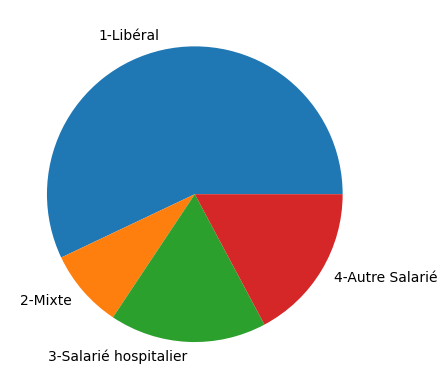

In [12]:
# Définition de la base de données réduite 
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']!='0-Ensemble') 
    & (df_medecins_effectif['tranche_age']=='00-Ensemble') 
    & (df_medecins_effectif['region'] == '00-Ensemble') 
    & (df_medecins_effectif['territoire'] == "0-France entière")] 

df = df_cond.copy()

labels = df['exercice'].unique()
sizes = df['effectif_2023'].unique()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

### Evolution du nombre de généralistes en France

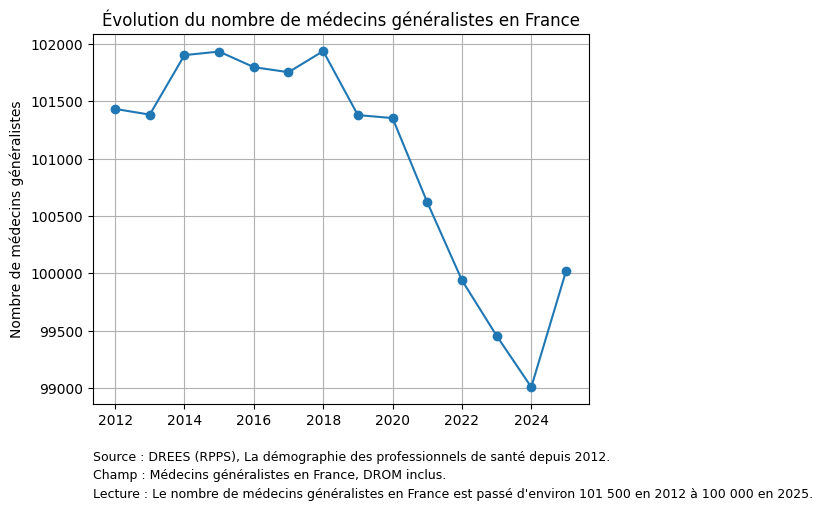

In [13]:
# Définition de la base de données réduite 
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']=='0-Ensemble') 
    & (df_medecins_effectif['tranche_age']=='00-Ensemble') 
    & (df_medecins_effectif['region'] == '00-Ensemble')
    & (df_medecins_effectif['departement'] == '000-Ensemble') 
    & (df_medecins_effectif['territoire'] == "0-France entière")] 
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026)) 

# Définition des ordonnées : effectifs des années 2012 à 2025 
effectifs = df[[f"effectif_{a}" for a in annees]].values.flatten() 
plt.plot(annees, effectifs, marker = "o") 

# Affichage du graphique 
plt.ylabel("Nombre de médecins généralistes") 
plt.title("Évolution du nombre de médecins généralistes en France") 

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : Le nombre de médecins généralistes en France est passé d'environ 101 500 en 2012 à 100 000 en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

### Evolution du nombre de généralistes par région

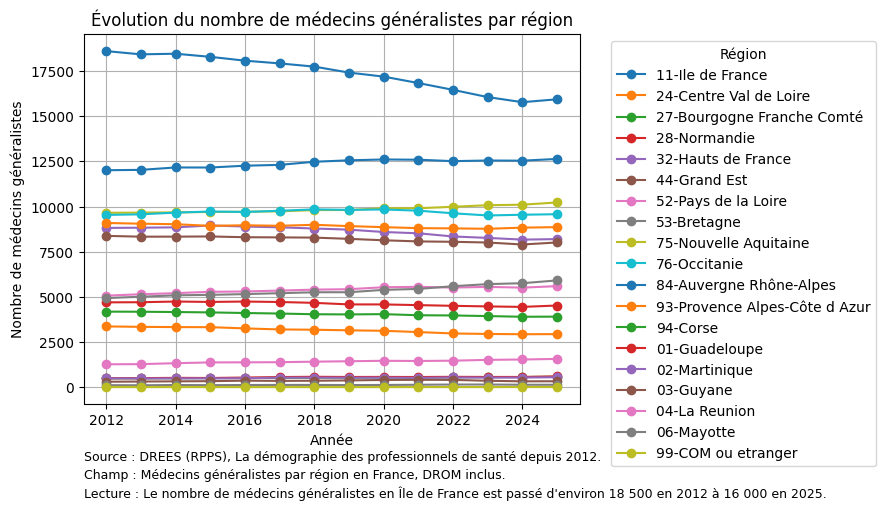

In [14]:
# Définition de la base de données réduite 
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']=='0-Ensemble') & (df_medecins_effectif['tranche_age']=='00-Ensemble') & (df_medecins_effectif['region'] != '00-Ensemble')]
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026))

# Définition des ordonnées : effectifs par région des années 2012 à 2025 
for region in df['region'].unique() :
    df_region = df[(df['region'] == region) & (df['departement'] == '000-Ensemble')]
    effectifs = df_region[[f"effectif_{a}" for a in annees]].values.flatten()
    plt.plot(annees, effectifs, label = region, marker = "o")

# Affichage du graphique 
plt.xlabel("Année")
plt.ylabel("Nombre de médecins généralistes")
plt.title(f"Évolution du nombre de médecins généralistes par région")

# Légende
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc="upper left")

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes par région en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : Le nombre de médecins généralistes en Île de France est passé d'environ 18 500 en 2012 à 16 000 en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

### Evolution de l'âge moyen des généralistes en France

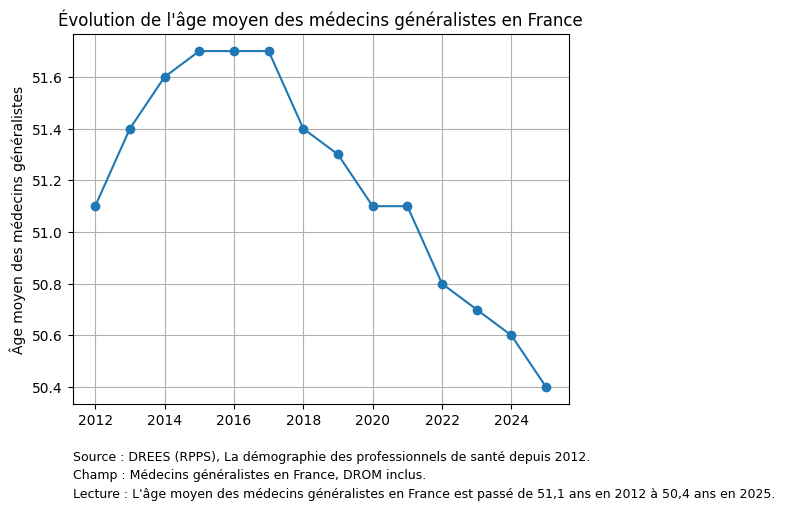

In [15]:
# Définition de la base de données réduite 
df_cond = df_medecins_age[(df_medecins_age['exercice']=='0-Ensemble') 
    & (df_medecins_age['region'] == '00-Ensemble') 
    & (df_medecins_age['territoire'] == "0-France entière")] 
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026)) 


# Définition des ordonnées : effectifs des années 2012 à 2025 
effectifs = df[[f"am_{a}" for a in annees]].values.flatten() 
plt.plot(annees, effectifs, marker = "o") 

# Affichage du graphique plt.xlabel("Année") 
plt.ylabel("Âge moyen des médecins généralistes") 
plt.title("Évolution de l'âge moyen des médecins généralistes en France") 
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : L'âge moyen des médecins généralistes en France est passé de 51,1 ans en 2012 à 50,4 ans en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

### Evolution du nombre de médecins généralistes par tranche d'âge en France

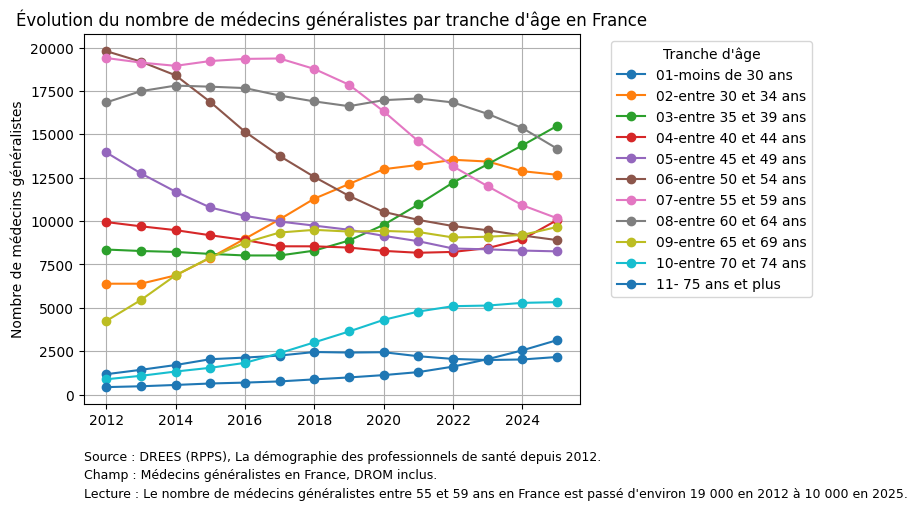

In [16]:
# Définition de la base de données réduite 
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']=='0-Ensemble') 
    & (df_medecins_effectif['region'] == '00-Ensemble') 
    & (df_medecins_effectif['territoire'] == "0-France entière")
    & (df_medecins_effectif['tranche_age'] != "00-Ensemble")] 
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026)) 

# Définition des ordonnées : effectifs par tranche des années 2012 à 2025 
for tranche in df['tranche_age'].unique() : 
    df_age = df[df['tranche_age'] == tranche]
    effectifs = df_age[[f"effectif_{a}" for a in annees]].values.flatten() 
    plt.plot(annees, effectifs, label = tranche, marker = "o") 

# Affichage du graphique 
plt.ylabel("Nombre de médecins généralistes") 
plt.title("Évolution du nombre de médecins généralistes par tranche d'âge en France") 

# Légende
plt.legend(title="Tranche d'âge", bbox_to_anchor=(1.05, 1), loc="upper left")

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : Le nombre de médecins généralistes entre 55 et 59 ans en France est passé d'environ 19 000 en 2012 à 10 000 en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

### Evolution de la proportion des médecins généralistes par tranche d'âge en France

/tmp/ipykernel_124210/4196299119.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("OrRd")


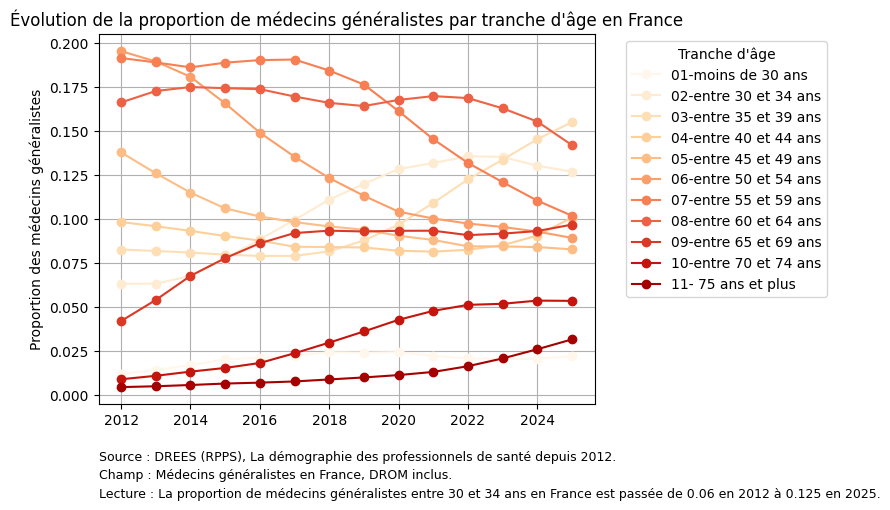

In [17]:
# Définition de la base de données réduite 
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']=='0-Ensemble') 
    & (df_medecins_effectif['region'] == '00-Ensemble') 
    & (df_medecins_effectif['territoire'] == "0-France entière")] 
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026)) 

# Définition de nouvelles variables proportion par année
for annee in annees:
    total = df.loc[df['tranche_age'] == '00-Ensemble', f'effectif_{annee}'].values[0]
    df[f'proportion_{annee}'] = df[f'effectif_{annee}'] / total

# Définition des nuances de couleurs
cmap = cm.get_cmap("OrRd")
colors = cmap(np.linspace(0, 1, 12))
i = 0

# Définition des ordonnées : proportion des tranches des années 2012 à 2025 
for tranche in df['tranche_age'].unique() : 
    if tranche != "00-Ensemble" :
        df_age = df[df['tranche_age'] == tranche]
        proportion = df_age[[f"proportion_{a}" for a in annees]].values.flatten()
        plt.plot(annees, proportion, label = tranche, marker = "o", color = colors[i]) 
        i += 1

# Affichage du graphique 
plt.ylabel("Proportion des médecins généralistes") 
plt.title("Évolution de la proportion de médecins généralistes par tranche d'âge en France") 

# Légende
plt.legend(title="Tranche d'âge", bbox_to_anchor=(1.05, 1), loc="upper left")

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : La proportion de médecins généralistes entre 30 et 34 ans en France est passée de 0.06 en 2012 à 0.125 en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

### Etude de la densité de médecin par département pour l'année 2023

In [ ]:
df = df_medecins_densite.copy()
df = df[(df['departement'] != '000-Ensemble') 
    & (df['tranche_age'] == '00-Ensemble')
    & (df['exercice'] == '0-Ensemble')]

df.reset_index(inplace = True, drop = True)

df['departement'] = df['departement'].astype(str).str[:3]

# Départements

departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

departements['INSEE_DEP'] = departements['INSEE_DEP'].str.zfill(3)

# Test d'affichage de la carte
departements.plot().axis('off')

In [ ]:
# On joint les deux bases
departements = departements.merge(df, left_on = "INSEE_DEP", right_on = "departement", how="left")
departements = departements.to_crs(2154)

departements

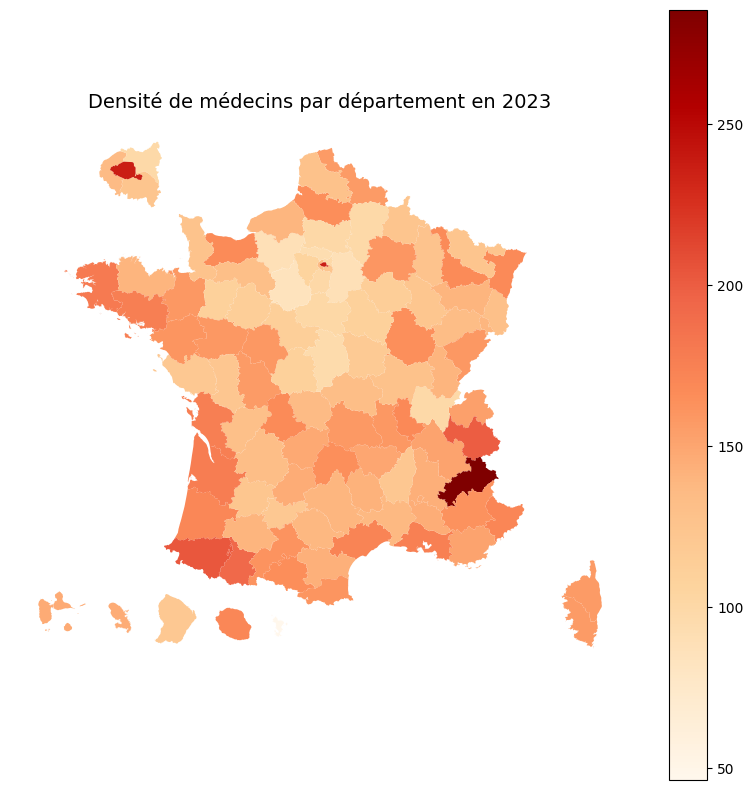

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(
    ax=ax,
    column="densite_2023",
    cmap="OrRd",               
    linewidth=0,
    edgecolor="lightgrey",
    legend=True,
)

ax.axis("off")
ax.set_title("Densité de médecins par département en 2023", fontsize=14)

plt.show()

## Base de l'indicateur APL

### Etude de l'indicateur APL par commune/département pour l'année 2023

In [21]:
df_APL['APL_2023'].dropna().describe()
df_APL['APL_dep_2023'].dropna().describe()

count     34954.000000
mean       7221.329519
std       15897.297755
min        1240.784239
25%        2782.739119
50%        4361.148361
75%        6852.396080
max      516344.895282
Name: APL_dep_2023, dtype: float64

### Cartographie de l'indicateur APL par commune pour l'année 2023

In [22]:
df = df_APL.copy()
departements = df_APL['departement'].unique()

# 1. Communes
communes = carti_download(
    values = departements,
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

# 2. Départements 
departements = communes.dissolve("INSEE_DEP")

communes = communes.merge(df, left_on = "INSEE_COG", right_on = "Code commune INSEE", how="left")
communes = communes.to_crs(2154)

There was an error while reading the file from the URL: https://minio.lab.sspcloud.fr/projet-cartiflette/production/provider=IGN/dataset_family=ADMINEXPRESS/source=EXPRESS-COG-CARTO-TERRITOIRE/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=97/vectorfile_format=geojson/territory=metropole/simplification=0/raw.geojson
Error message: '/vsimem/pyogrio_6b2794086a404c3c895197461a6c3303' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.


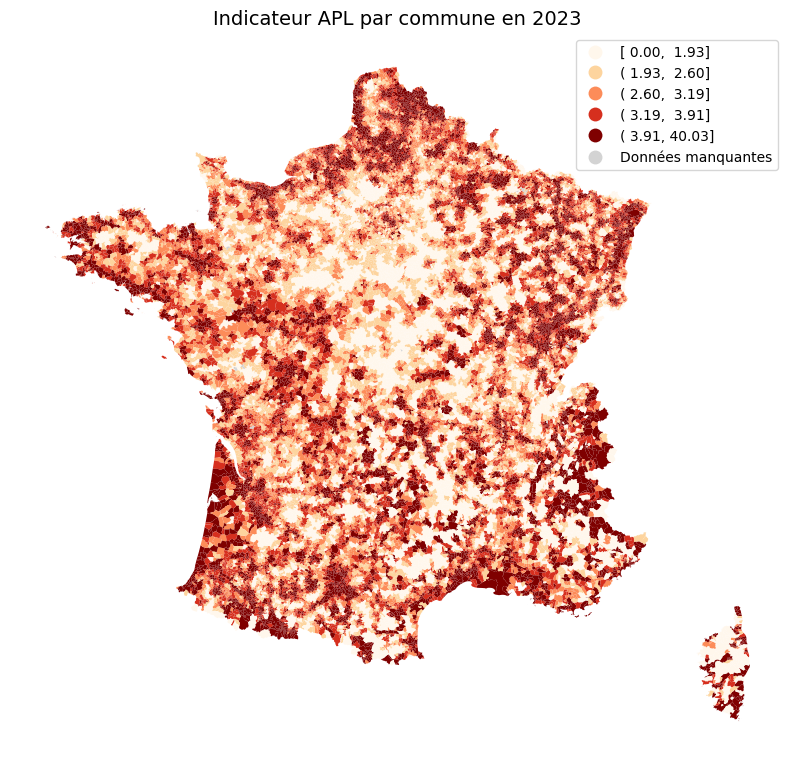

In [24]:
# Réalisation de la carte
fig, ax = plt.subplots(figsize=(10,10))

# On choisit le nombre de quantiles : 
n = 5

communes.plot(
    ax=ax,
    column="APL_2023",
    cmap="OrRd",               
    linewidth=0,
    edgecolor="lightgrey",
    legend=True,
    scheme = "quantiles",
    k = n, 
    legend_kwds={"labels": [i for i in range(n)]},
    missing_kwds={"color": "lightgrey", "label": "Données manquantes"}
)

ax.axis("off")
ax.set_title("Indicateur APL par commune en 2023", fontsize=14)

q = mapclassify.Quantiles(communes['APL_2023'].dropna(), k=n)
mapping = {i: s for i, s in enumerate(q.get_legend_classes())}
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
replace_legend_items(ax.get_legend(), mapping)

plt.show()

### Cartographie de l'indicateur APL par département pour l'année 2023

In [ ]:
# Départements

departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# Test d'affichage de la carte
departements.plot().axis('off')

In [26]:
# On crée une copie de la table
df = df_APL.copy()

# On refait une carte, cette fois-ci des départements
df.drop_duplicates('departement', inplace = True)
departements = departements.merge(df, left_on = "INSEE_DEP", right_on = "departement", how="left")
departements = departements.to_crs(2154)

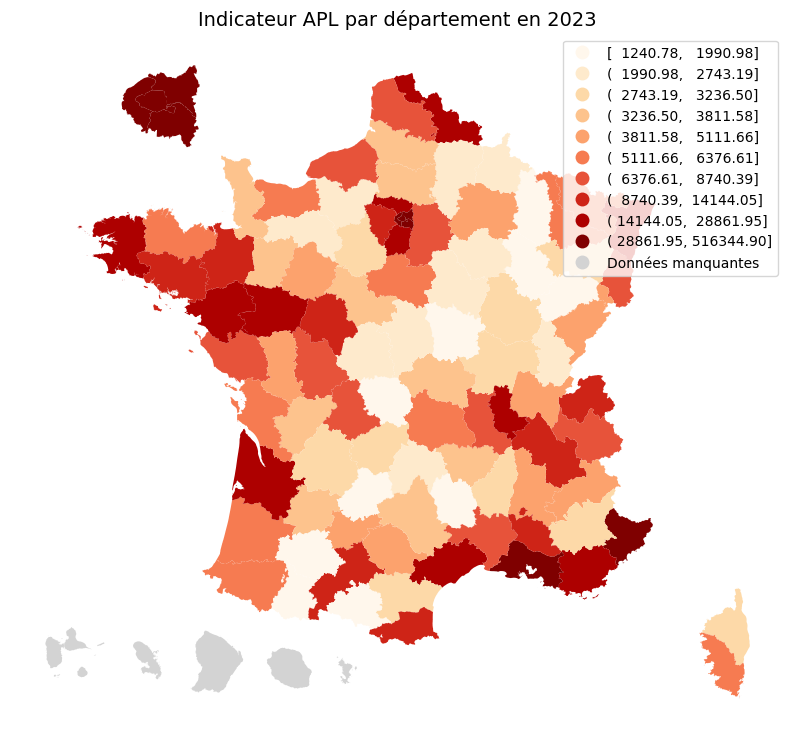

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(
    ax=ax,
    column="APL_dep_2023",
    cmap="OrRd",               
    linewidth=0,
    edgecolor="lightgrey",
    legend=True,
    scheme = "quantiles",
    k = 10, 
    legend_kwds={"labels": [i for i in range(10)]},
    missing_kwds={"color": "lightgrey", "label": "Données manquantes"}
)

ax.axis("off")
ax.set_title("Indicateur APL par département en 2023", fontsize=14)

q10 = mapclassify.Quantiles(departements['APL_dep_2023'].dropna(), k=10)
mapping = {i: s for i, s in enumerate(q10.get_legend_classes())}
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
replace_legend_items(ax.get_legend(), mapping)

plt.show()

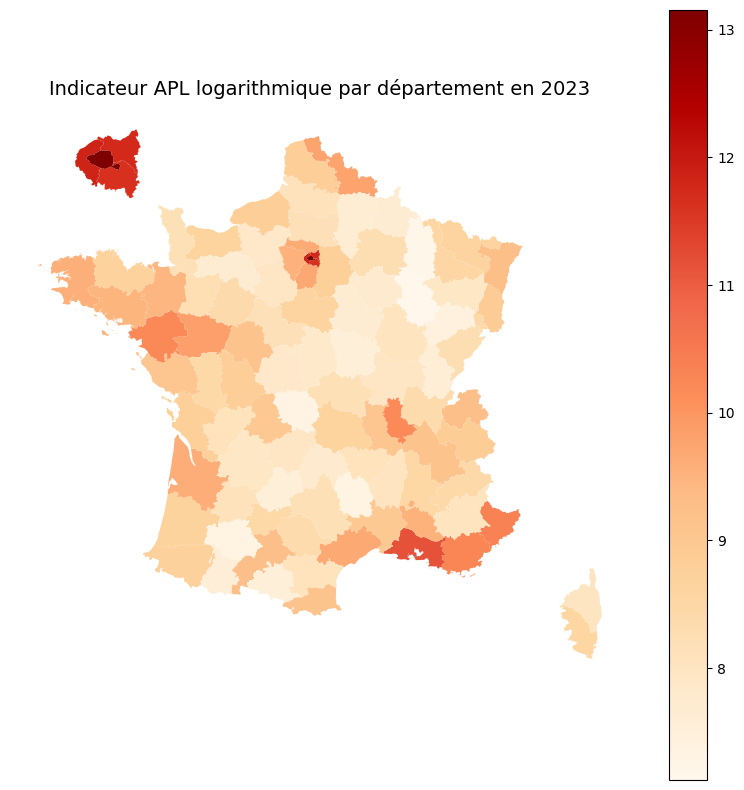

In [28]:
departements["APL_dep_2023_log"] = np.log1p(departements["APL_dep_2023"])

fig, ax = plt.subplots(figsize=(10,10))

departements.plot(
    ax=ax,
    column="APL_dep_2023_log",
    cmap="OrRd",               
    linewidth=0,
    legend=True,
    edgecolor="lightgrey", 
)

ax.axis("off")
ax.set_title("Indicateur APL logarithmique par département en 2023", fontsize=14)

plt.show()

## Base des indicateurs communaux

In [29]:
df = df_pop_communes.copy()
departements = df_pop_communes['departement'].unique()

# On limite les départements à ceux de la France métropolitaine pour des soucis d'affichage
departements = departements[:96]

In [ ]:
# 1. Communes
gdf_communes = carti_download(
    values = departements,
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

communes = communes.merge(df, right_on = 'Code', left_on = 'INSEE_COM')

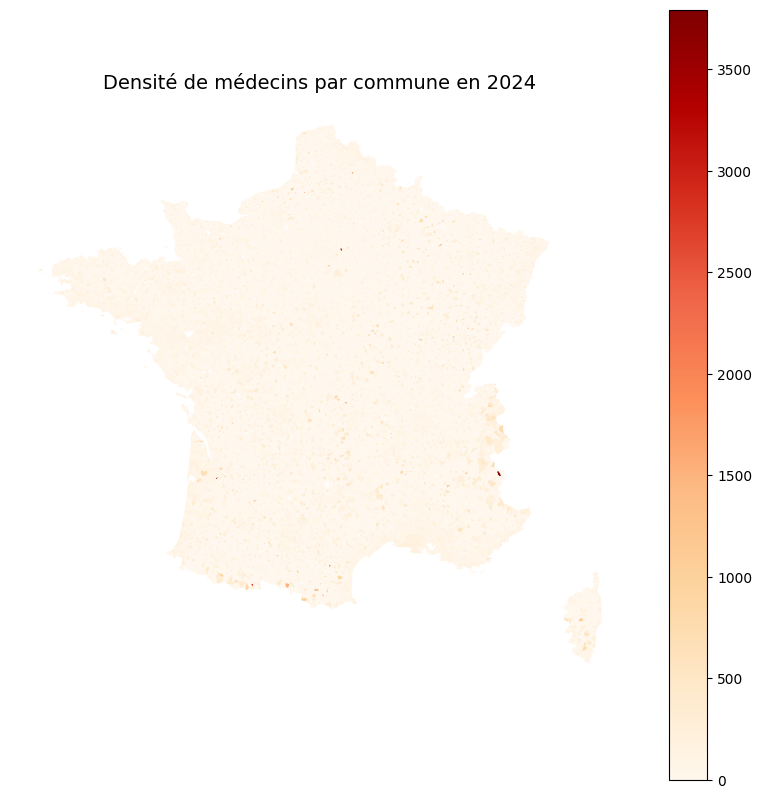

In [31]:
fig, ax = plt.subplots(figsize=(10,10))

communes.plot(
    ax=ax,
    column="Densité médecins généralistes 2024",
    cmap="OrRd",               
    linewidth=0,
    edgecolor="lightgrey",
    legend=True,
)

ax.axis("off")
ax.set_title("Densité de médecins par commune en 2024", fontsize=14)

plt.show()

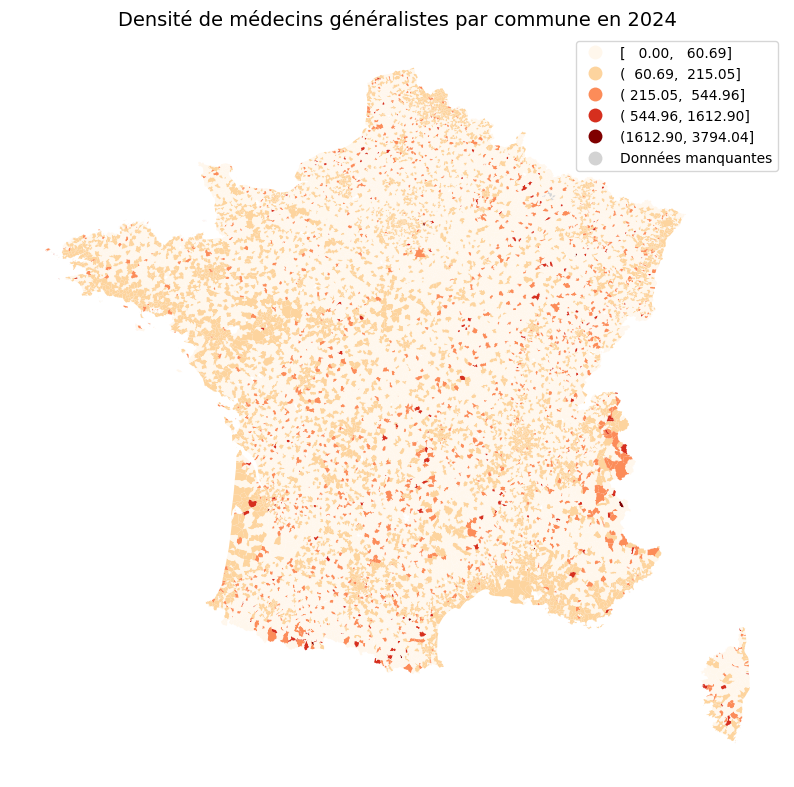

In [ ]:
# Réalisation de la carte
fig, ax = plt.subplots(figsize=(10,10))

# On choisit le nombre de groupes : 
n = 5

communes.plot(
    ax=ax,
    column="Densité médecins généralistes 2024",
    cmap="OrRd",               
    linewidth=0,
    edgecolor="lightgrey",
    legend=True,
    scheme = "NaturalBreaks",
    k = n, 
    legend_kwds={"labels": [i for i in range(n)]},
    missing_kwds={"color": "lightgrey", "label": "Données manquantes"}
)

ax.axis("off")
ax.set_title("Densité de médecins généralistes par commune en 2024", fontsize=14)

q = mapclassify.NaturalBreaks(communes['Densité médecins généralistes 2024'].dropna(), k=n)
mapping = {i: s for i, s in enumerate(q.get_legend_classes())}
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
replace_legend_items(ax.get_legend(), mapping)

plt.show()

## Base de la patientèle (nombre de patients uniques par médecin)

### Etude du nombre moyen de patients par médecin en 2017

In [33]:
# On s'intéresse d'abord uniquement à l'année 2017
df = df_patientele.copy()
df = df[(df['annee'] == 2017) & (df['profession_sante'] == 'Ensemble des médecins généralistes')]

df['nombre_patients_uniques']

146      1748.0
147      2570.0
148      2135.0
149      3270.0
150      1829.0
          ...  
27558    1504.0
27559    1540.0
27560    1315.0
27561    1408.0
27562    1551.0
Name: nombre_patients_uniques, Length: 120, dtype: float64

array(['43', '65', '29', '22', '38', '86', '27', '42', '06', '82', '16',
       '74', '85', '44', '63', '55', '01', '21', '26', '77', '71', '48',
       '35', '45', '31', '73', '40', '09', '34', '03', '41', '52', '64',
       '54', '11', '47', '59', '32', '46', '81', '70', '19', '83', '58',
       '68', '07', '56', '05', '23', '15', '12', '33', '2B', '13', '67',
       '53', '02', '2A', '80', '49', '87', '04', '57', '62', '24', '76',
       '17', '79', '14', '51', '61', '50', '60', '92', '30', '88', '95',
       '25', '69', '93', '72', '39', '94', '91', '90', '89', '28', '78',
       '18', '84', '08', '66', '36', '10', '37', '75', '971', '972',
       '973', '974', '976'], dtype=object)

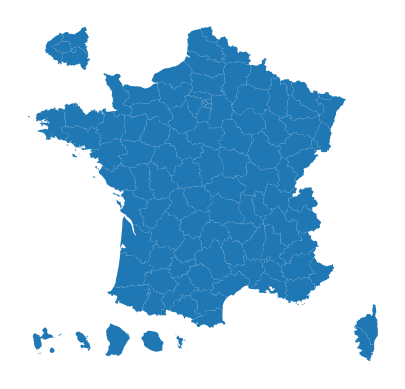

In [34]:
# Départements
departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# Test d'affichage de la carte
departements.plot().axis('off')
departements['INSEE_DEP'].unique()

In [35]:
# On refait une carte, cette fois-ci des départements

df.drop_duplicates('departement', inplace = True)
departements = departements.merge(df, left_on = "INSEE_DEP", right_on = "departement", how="left")
departements = departements.to_crs(2154)

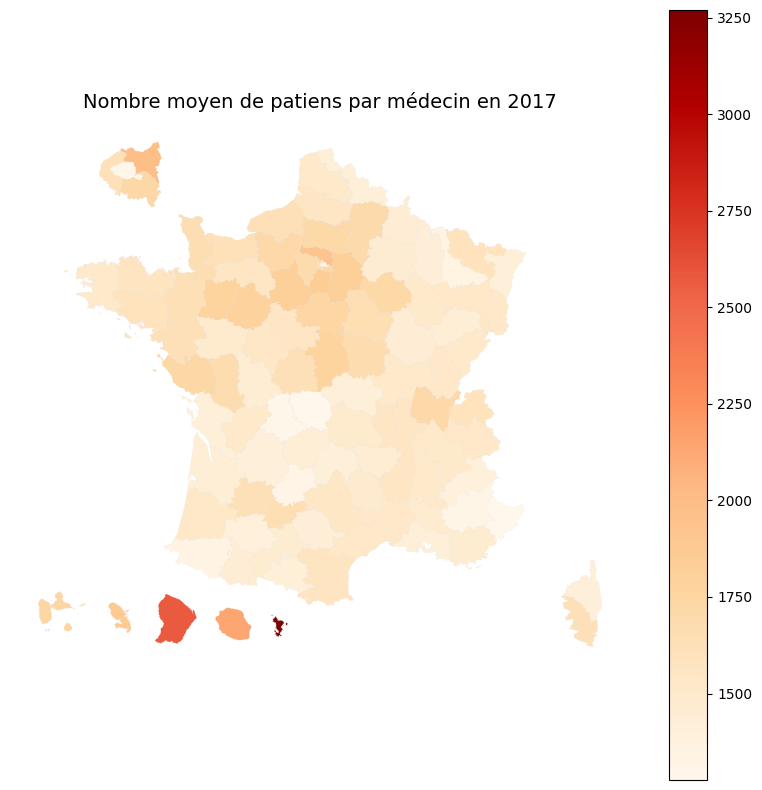

In [36]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(
    ax=ax,
    column="nombre_patients_uniques",
    cmap="OrRd",               
    linewidth=0.05,
    legend=True,
    edgecolor="lightgrey", 
)

ax.axis("off")
ax.set_title("Nombre moyen de patiens par médecin en 2017", fontsize=14)

plt.show()

# Modélisation : corrélation entre APL et différentes variables

### Premier test uniquement sur l'année 2023

In [37]:
# On réarrange les tables APL densités de médecins
df1 = df_APL.copy()
df1['departement'] = df1['departement'].str.zfill(3)
df1.drop_duplicates('departement', inplace = True)

df2 = df_medecins_densite.copy()
df2 = df2[(df2['departement'] != '000-Ensemble') 
    & (df2['tranche_age'] == '00-Ensemble')
    & (df2['exercice'] == '0-Ensemble')]
df2['departement'] = df2['departement'].astype(str).str[:3]

df = df1.merge(df2, on = 'departement')
df.reset_index(drop = True, inplace = True)

df['APL_dep_2023']

0       4403.329792
1       2106.510502
2       3590.024708
3       3182.436449
4       4575.760604
          ...      
91     16317.045747
92    137381.268871
93    126595.716126
94    112543.141196
95     15617.893344
Name: APL_dep_2023, Length: 96, dtype: float64

<Axes: xlabel='densite_2023', ylabel='APL_dep_2023'>

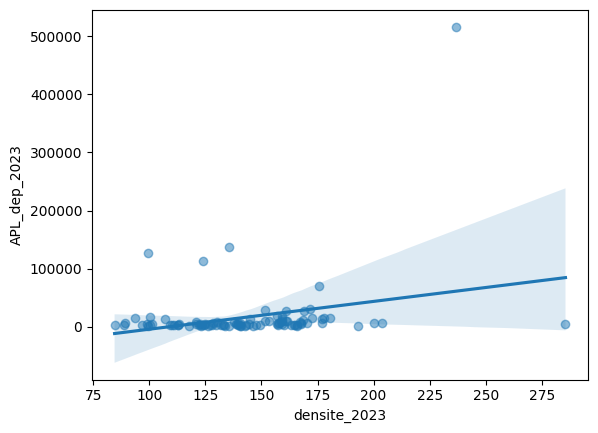

In [38]:
sns.regplot(
    data = df,
    x = 'densite_2023',
    y = 'APL_dep_2023',
    fit_reg = True,
    scatter_kws={'alpha':0.5}
)

### On étend la régression aux années pour lesquelles on a des données : 2015 à 2023, 2020 exclu

In [ ]:
# On réarrange les tables APL densités de médecins
df1 = df_APL.copy()
df1['departement'] = df1['departement'].str.zfill(3)

df2 = df_medecins_densite.copy()
df2 = df2[(df2['departement'] != '000-Ensemble') 
    & (df2['tranche_age'] == '00-Ensemble')
    & (df2['exercice'] == '1-Libéral')]
df2['departement'] = df2['departement'].astype(str).str[:3]

df1.drop_duplicates('departement', inplace = True)

In [40]:
# On transforme les tables larges en tables longues de manière à pouvoir faire la régression en utilisant les données de toutes les années
annees = [2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023]
APL = [f"APL_dep_{annee}" for annee in annees]
densite = [f"densite_{annee}" for annee in annees] 

# Pour l'APL
df1_long = df1.melt(
    id_vars = ['departement'], 
    value_vars = APL, 
    var_name = 'annee',
    value_name = 'APL'
)

df1_long['annee'] = df1_long['annee'].astype(str).str[8:]

# Pour la densité
df2_long = df2.melt(
    id_vars = ['departement'], 
    value_vars = densite, 
    var_name = 'annee',
    value_name = 'densite' 
)

df2_long['annee'] = df2_long['annee'].astype(str).str[8:]

# On joint les deux tables
df = pd.merge(df2_long, df1_long, on=['departement', 'annee'])
df['APL'] = np.log(df['APL'])

<Axes: xlabel='densite', ylabel='APL'>

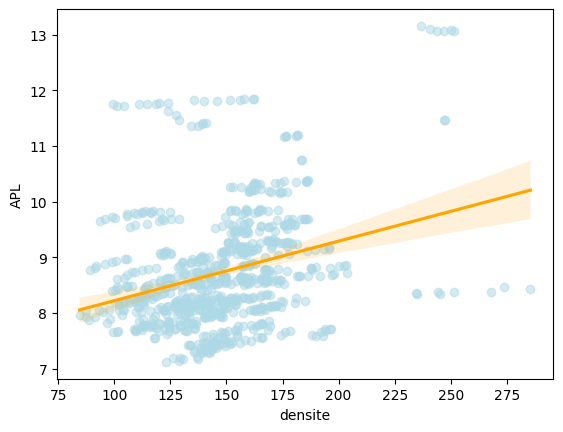

In [41]:
# Régression utilisant les données toutes années confondues
sns.regplot(
    data = df,
    x = 'densite',
    y = 'APL',
    fit_reg = True,
    scatter_kws={'alpha':0.5},
    color="lightblue", line_kws=dict(color="orange")
)

### Carte interactive pour l'évolution de l'APL par département

In [42]:
# On transforme la tables large en table longue 
df1 = df_APL.copy()
annees = [2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023]
APL = [f"APL_dep_{annee}" for annee in annees]

df1_long = df1.melt(
    id_vars = ['departement'], 
    value_vars = APL, 
    var_name = 'annee',
    value_name = 'APL'
)

df1_long['annee'] = df1_long['annee'].astype(str).str[8:]
df1_long

,departement,annee,APL
0,01,2015,4810.227825
1,01,2015,4810.227825
2,01,2015,4810.227825
3,01,2015,4810.227825
4,01,2015,4810.227825
...,...,...,...
279627,97,2023,67611.539462
279628,97,2023,67611.539462
279629,97,2023,67611.539462
279630,97,2023,67611.539462


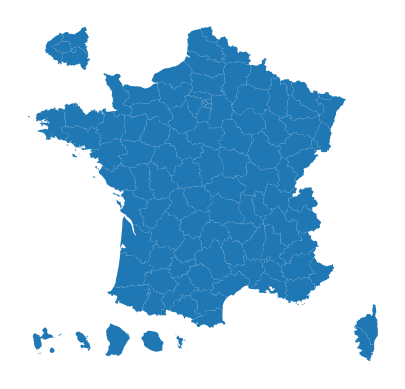

In [43]:
# Départements
departements = carti_download(
    values = ["France"],
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)

# Test d'affichage de la carte
departements.plot().axis('off')
departements['INSEE_DEP'].unique()

gdf_carte = departements.merge(df1_long, left_on='INSEE_DEP', right_on='departement')

# On trie impérativement par année pour l'animation
gdf_carte = gdf_carte.sort_values('annee')

# On réinitialise l'index pour que Plotly s'y retrouve
gdf_carte = gdf_carte.reset_index(drop=True)

In [44]:
# Fais crash le serveur donc à voir

# fig = px.choropleth(
#     gdf_carte,
#     geojson=gdf_carte.__geo_interface__,
#     locations=gdf_carte.index, # On utilise le nouvel index
#     color='APL',
#     animation_frame='annee',
#     range_color=[0, 4], 
#     scope="europe"
# )
# 
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()

# Lasso

### Importations

In [45]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
import seaborn as sns

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
import numpy as np

### Corrélations entre les variables

In [47]:
def plot_corr_heatmap(
    df: pd.DataFrame,
    drop_cols=None,
    column_labels: dict | None = None,
    decimals: int = 2,
    width: int = 600,
    height: int = 600,
    show_xlabels: bool = False
):
    """
    Trace une heatmap de corrélation (triangle inférieur) à partir d'un DataFrame.

    Paramètres
    ----------
    df : pd.DataFrame
        DataFrame d'entrée.
    drop_cols : list ou None
        Liste de colonnes à supprimer avant le calcul de la corrélation
        (ex: ['winner']).
    column_labels : dict ou None
        Dictionnaire pour renommer les colonnes (ex: column_labels).
    decimals : int
        Nombre de décimales pour l'arrondi avant corr().
    width, height : int
        Dimensions de la figure Plotly.
    show_xlabels : bool
        Afficher ou non les labels en abscisse.
    """
    data = df.copy()

    # 1. Colonnes à drop
    if drop_cols is not None:
        data = data.drop(columns=drop_cols)

    # 2. Arrondi + renommage éventuel
    if column_labels is not None:
        data = data.rename(columns=column_labels)
    data = data.round(decimals)

    # 3. Matrice de corrélation
    corr = data.corr()

    # 4. Masque triangle supérieur
    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr_masked = corr.mask(mask)

    # 5. Heatmap Plotly
    fig = px.imshow(
        corr_masked.values,
        x=corr.columns,
        y=corr.columns,
        color_continuous_scale='RdBu_r',  # échelle inversée
        zmin=-1,
        zmax=1,
        text_auto=".2f"
    )

    # 6. Hover custom
    fig.update_traces(
        hovertemplate="Var 1: %{y}<br>Var 2: %{x}<br>Corr: %{z:.2f}<extra></extra>"
    )

    # 7. Layout
    fig.update_layout(
        coloraxis_showscale=False,
        xaxis=dict(
            showticklabels=show_xlabels,
            title=None,
            ticks=''
        ),
        yaxis=dict(
            showticklabels=show_xlabels,
            title=None,
            ticks=''
        ),
        plot_bgcolor="rgba(0,0,0,0)",
        margin=dict(t=10, b=10, l=10, r=10),
        width=width,
        height=height
    )

    return fig


df = df_pop_communes.copy().drop(columns=["Code", "Libellé", "departement", "Densité médecins généralistes 2024"])
plot_corr_heatmap(df)

In [48]:
def plot_corr_with_target(
    df: pd.DataFrame,
    target: str,
    drop_cols=None,
    decimals: int = 2,
    width: int = 500,
    height: int = 900
):
    """
    Trace une heatmap des corrélations entre une variable cible
    et les autres variables du DataFrame.
    """
    data = df.copy()

    if drop_cols is not None:
        data = data.drop(columns=drop_cols)

    data = data.round(decimals)

    # Corrélation avec la variable cible
    corr = data.corr()[[target]].sort_values(by=target)

    fig = px.imshow(
        corr.values,
        x=[target],
        y=corr.index,
        color_continuous_scale="RdBu_r",
        zmin=-1,
        zmax=1,
        text_auto=".2f"
    )

    fig.update_traces(
        hovertemplate="Variable: %{y}<br>Corr: %{z:.2f}<extra></extra>"
    )

    fig.update_layout(
        coloraxis_showscale=False,
        xaxis_title=None,
        yaxis_title=None,
        width=width,
        height=height,
        margin=dict(t=20, b=20, l=20, r=20)
    )

    return fig

df = df_pop_communes.copy().drop(columns=["Code", "Libellé", "departement", "Densité médecins généralistes 2024"])
plot_corr_with_target(df,"Médecin généraliste (en nombre) 2024")

In [49]:
def extract_features_selected(lasso: Pipeline, preprocessing_step_name: str = 'preprocess') -> pd.Series:
    """
    Extracts selected features based on the coefficients obtained from Lasso regression.

    Parameters:
    - lasso (Pipeline): The scikit-learn pipeline containing a trained Lasso regression model.
    - preprocessing_step_name (str): The name of the preprocessing step in the pipeline. Default is 'preprocess'.

    Returns:
    - pd.Series: A Pandas Series containing selected features with non-zero coeffaicients.
    """
    # Check if lasso object is provided
    if not isinstance(lasso, Pipeline):
        raise ValueError("The provided lasso object is not a scikit-learn pipeline.")
    
    # Extract the final transformer from the pipeline
    lasso_model = lasso[-1]

    # Check if lasso_model is a Lasso regression model
    if not isinstance(lasso_model, Lasso):
        raise ValueError("The final step of the pipeline is not a Lasso regression model.")

    # Check if lasso model has 'coef_' attribute
    if not hasattr(lasso_model, 'coef_'):
        raise ValueError("The provided Lasso regression model does not have 'coef_' attribute. "
                         "Make sure it is a trained Lasso regression model.")

    # Get feature names from the preprocessing step
    features_preprocessing = lasso[preprocessing_step_name].get_feature_names_out()

    # Extract selected features based on non-zero coefficients
    features_selec = pd.Series(features_preprocessing[np.abs(lasso_model.coef_) > 0])

    return features_selec

### Implémentations de Lasso

In [52]:
df = df_pop_communes.copy().drop(columns=["Code", "Libellé", "departement", "Densité médecins généralistes 2024"])

# Définition de X (variables explicatives) et y (cible)
X = df.drop(columns=["Médecin généraliste (en nombre) 2024"]) 
y = df["Médecin généraliste (en nombre) 2024"]

# Séparation de la base en une base d'entraînement et une base de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifier les lignes où la valeur du nombre de médecins est manquante
mask = y_train.isna()

# Supprimer ces lignes de y_train et de X_train 
y_train = y_train[~mask]
X_train = X_train[~mask]

In [53]:
# Pipeline pour les variables numériques (ici, toutes)
pipeline_num = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[('num', pipeline_num, X_train.columns)]
        )

# Pipeline finale
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse 

In [ ]:
# Accéder au modèle à l'intérieur du pipeline
lasso_model = pipeline['model']

# Récupérer le nom des colonnes après transformation (surtout pour le OneHot)
feature_names = pipeline['preprocessor'].get_feature_names_out()

# Affichage des coefficients non nuls
coeffs = pd.Series(lasso_model.coef_, index=feature_names)
print("Variables sélectionnées (coeff != 0) :")
print(coeffs[coeffs != 0])

In [ ]:
# On applique l'imputation (pour boucher les NaN avec la moyenne)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_train)

# On applique la standardisation (obligatoire pour le LASSO)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# On peut maintenant lancer lasso_path sans erreur
alphas_to_test = [0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0]

alphas_computed, coefs_lasso, _ = lasso_path(
    X_scaled, 
    y_train, 
    alphas=alphas_to_test
)

# On compte combien de coefficients sont différents de 0 pour chaque colonne (axis=0)
n_nonzero = np.sum(coefs_lasso != 0, axis=0)

# Affichage des résultats sous forme de dictionnaire ou DataFrame
import pandas as pd
resultats_selection = pd.DataFrame({
    'Alpha': alphas_computed,
    'Variables_Selectionnees': n_nonzero
})

print(resultats_selection)

In [ ]:
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

lcv = (
  LassoCV(
    alphas=my_alphas,
    fit_intercept=False,
    random_state=0,
    cv=5
    ).fit(
      X_scaled, y_train
    )
)

print("alpha optimal :", lcv.alpha_)

In [ ]:
# Pipeline pour les variables numériques (ici, toutes)
pipeline_num = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, X_train.columns)]
        )

# Pipeline finale
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=lcv.alpha_))
])

lasso_optimal = pipeline.fit(X_train,y_train)

In [ ]:
# Accéder au modèle à l'intérieur du pipeline
lasso_model = pipeline['model']

# Récupérer le nom des colonnes après transformation (surtout pour le OneHot)
feature_names = pipeline['preprocessor'].get_feature_names_out()

# Affichage des coefficients non nuls
coeffs = pd.Series(lasso_model.coef_, index=feature_names)
print("Variables sélectionnées (coeff != 0) :")
print(coeffs[coeffs != 0])

Variables sélectionnées (coeff != 0) :
num__Population de 15 ans ou + selon le groupe socioprofessionnel actuel ou antérieur 2022 Artisans, commerçants, chefs entreprise    4.738895
num__Boulangerie-pâtisserie (en nombre) 2024                                                                                          3.051357
num__École maternelle, primaire, élémentaire (en nombre) 2024                                                                         0.306890
num__Lycée (en nombre) 2024                                                                                                           2.020251
num__Population municipale 2023                                                                                                       7.099902
num__Population de 15 ans ou + selon le groupe socioprofessionnel actuel ou antérieur 2022 Ensemble                                   2.224812
num__Nb de ménages fiscaux 2021                                                                        